In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

import missingno as msno

In [2]:
ROOT = '../'

In [3]:
df = pd.read_csv(ROOT + 'dataset/data.csv')
#drop last column
df = df.iloc[:, :-1]
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df_all_features = df.iloc[:,1:].copy()
features_name= list(df_all_features.columns)[1:]
df_all_features.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: >

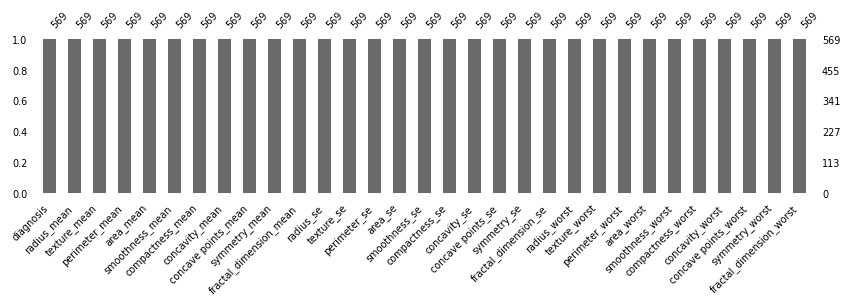

In [5]:
msno.bar(df_all_features,figsize = (10,2),fontsize =7)

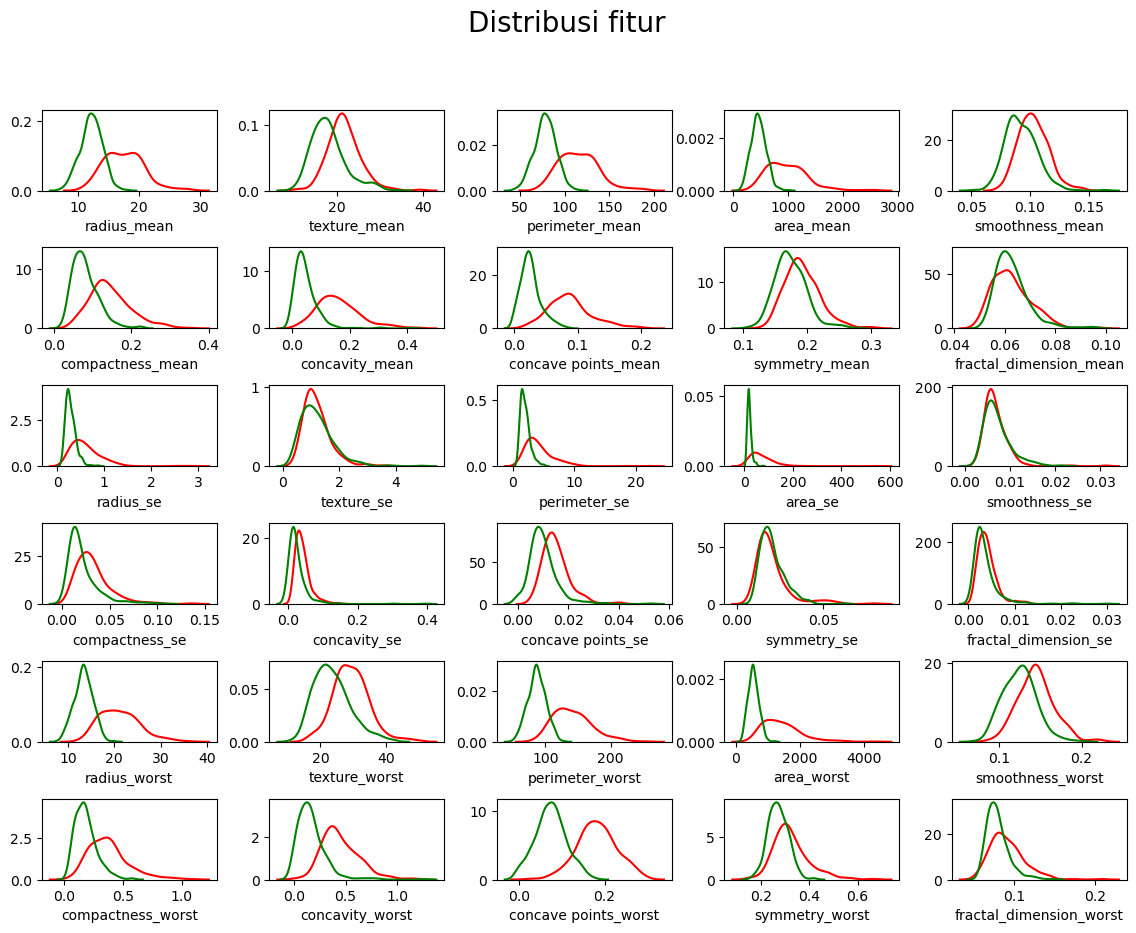

In [6]:
# Plot KDE Berdasarkan Target
import matplotlib.pyplot as plt
import seaborn as sns
def plot_kde(data,start,end,row_num,col_num,title,target ):
    df_set_pos = data[data[target] == "M"].drop(target,axis = 1)
    df_set_neg = data[data[target] == "B"].drop(target,axis = 1)
    df_set_pos = df_set_pos.iloc[:,start:end+1]
    df_set_neg = df_set_neg.iloc[:,start:end +1]
    #plot numerical data (Classification Task)
    numerical = df_set_pos.select_dtypes(include=['int64', 'float64']).columns
    fig, axes = plt.subplots(row_num,col_num,figsize = (14,10))
    fig.subplots_adjust(hspace=0.7, wspace=0.3)
    fig.suptitle(title,fontsize = 20)
    row = 0
    cols = 0

    for item in numerical:
        if cols > col_num -1:
            cols = 0
            row += 1
        ax1 = sns.kdeplot(x = item,data = df_set_pos,ax = axes[row,cols],color = "red" ,label = "Malignant")
        ax2 = sns.kdeplot(x = item,data = df_set_neg,ax = axes[row,cols],color = "green" ,label = "Benign")
        #ax1.legend()
        ax1.set_ylabel("")
        ax2.set_ylabel("")
        cols += 1

plot_kde(df_all_features,0,30,6,5,'Distribusi fitur',"diagnosis")

In [7]:
#plot distribution of features
numerical = df_mean_features.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(5,2,figsize = (20,10))
fig.subplots_adjust(hspace=1, wspace=0.2)
row = 0
cols = 0

for item in numerical:
    if cols > 1:
        cols = 0
        row += 1
    ax = sns.histplot(x=item,data=df_mean_features ,ax=axes[row, cols],bins = 20)
    ax.set_ylabel("")
    cols += 1

NameError: name 'df_mean_features' is not defined

In [74]:
# sns.heatmap(df[all_features_name].corr(method="pearson"),cmap = "bwr" ,vmin = -1,vmax=1,annot = True,cbar = False,fmt = ".2f")

In [18]:
def correlation(dataset, threshold):
    df_corr = dataset.corr(method="pearson")
    columns = np.full((df_corr.shape[0],), True, dtype=bool)
    for i in range(df_corr.shape[0]):
        for j in range(i+1, df_corr.shape[0]):
            if df_corr.iloc[i,j] >= threshold:
                if columns[j]:
                    columns[j] = False
    selected_columns = df_corr.columns[columns]
    return list(selected_columns)
uncorr_features = correlation(df[features_name],0.9)
print(uncorr_features)
print(len(uncorr_features))

['radius_mean', 'texture_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean', 'symmetry_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'smoothness_worst', 'compactness_worst', 'concavity_worst', 'symmetry_worst', 'fractal_dimension_worst']
20


Text(0.5, 0, 'Diagnosis')

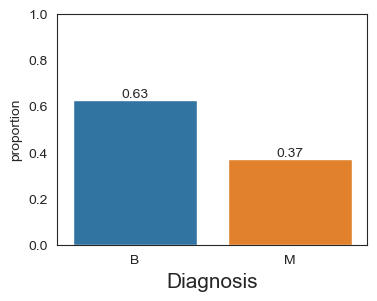

In [19]:
#plot distribution of diagnosis
df_proportion = df_all_features.diagnosis.value_counts(normalize=True).to_frame().reset_index()
plt.figure(figsize = (4,3))
sns.set_style("white")
sns.barplot(x = "diagnosis",y = "proportion",data = df_proportion)
#add data labels
for i in range(df_proportion.shape[0]):
    count = df_proportion.iloc[i,1]
    plt.text(i,count+0.01,round(count,2),ha = "center")
plt.ylim(0,1)
plt.xlabel("Diagnosis",fontsize = 15)

In [20]:
## stratified shuffle
X = df_all_features.drop(columns="diagnosis")
y = df_all_features["diagnosis"]
#replace M and B with 1 and 0
y = y.replace({"M":1,"B":0})

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.impute import SimpleImputer

num_pipe = Pipeline([
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

preprocessor = ColumnTransformer([
   ("numerical",num_pipe,uncorr_features)
],remainder = "drop",verbose_feature_names_out=False)

In [22]:
preprocessor.fit(X_train)
preprocessor.transform(X_train)

array([[ 0.51855873,  0.89182579, -0.97474371, ..., -0.6102273 ,
         0.05456632,  0.02183673],
       [-0.51636409, -1.63971029,  0.47621906, ..., -0.71266641,
        -0.13757624, -0.90440164],
       [-0.36811839,  0.45551496, -1.43297929, ..., -0.4313129 ,
        -0.675893  , -0.14401559],
       ...,
       [-0.32616206,  1.33280304, -0.86070951, ..., -1.08833945,
        -0.96490082, -1.16888375],
       [ 0.00948859,  0.25952507, -0.46753638, ..., -0.11313795,
        -0.60284707, -0.30545988],
       [ 0.80945595,  0.36918608,  1.11285171, ...,  0.55153613,
        -0.46151907, -0.44817001]])

In [23]:
from sklearn.model_selection import cross_val_score,StratifiedKFold,RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


df_model = pd.DataFrame(columns = ["model","set_data","score"])
set_data = ["test","cross_val"]
models = {
        "KNN" : KNeighborsClassifier(),
        "SVM":SVC(),
        "Random Forest":RandomForestClassifier(random_state = 42,n_jobs = -1),
        "Logistic Regression" : LogisticRegression(random_state = 42), 
        "LGBM" : LGBMClassifier(random_state = 42),
        "XGB" : XGBClassifier(random_state = 42) 
        }

scorer = "accuracy"
num_cv = 3
cv = RepeatedStratifiedKFold(n_splits = num_cv,n_repeats = 5,random_state = 42)

for m in models:
    pipeline = Pipeline([  
    ('prep', preprocessor), 
    ('algo', models[m])
])
    spot_check = cross_val_score(pipeline,X_train,y_train,cv = cv,scoring = scorer,n_jobs= -1 )
    spot_check = spot_check.mean()
    model = pipeline.fit(X_train,y_train)
    score = pipeline.score(X_test,y_test)
    model_list = [m] * 2
    tes = pd.DataFrame(list(zip(model_list,set_data,[score,spot_check])),columns = ["model","set_data","score"])
    df_model = pd.concat([df_model,tes],ignore_index = True)

In [24]:
df_model

,model,set_data,score
0,KNN,test,0.947368
1,KNN,cross_val,0.949887
2,SVM,test,0.973684
3,SVM,cross_val,0.956053
4,Random Forest,test,0.938596
5,Random Forest,cross_val,0.951182
6,Logistic Regression,test,0.973684
7,Logistic Regression,cross_val,0.971427
8,LGBM,test,0.947368
9,LGBM,cross_val,0.956474


## KNN

In [16]:
from sklearn.metrics import classification_report
import optuna 
def tuning_model(objective,pipeline,n_trial = 100):
    study = optuna.create_study(direction="maximize",sampler=optuna.samplers.RandomSampler(seed=42))
    optuna.logging.set_verbosity(optuna.logging.WARNING)
    study.optimize(objective, n_trials=n_trial,show_progress_bar=True,)
    best_params = study.best_params
    pipeline.set_params(**best_params)
    pipeline.fit(X_train, y_train)
    test_score = pipeline.score(X_test, y_test)
    train_score = pipeline.score(X_train, y_train)
    valid_score = study.best_value
    y_pred = pipeline.predict(X_test)
    print("best params:", best_params)
    print("train score:", train_score)
    print("test score:", test_score)
    print("valid score:", valid_score)
    print(classification_report(y_test, y_pred))
    return pipeline

In [94]:
pipeline_knn = Pipeline([
    ('prep', preprocessor),
    ('algo', KNeighborsClassifier())
])

def objective_knn(trial):
    n_neighbors = trial.suggest_int("algo__n_neighbors", 1, 25)
    p = trial.suggest_int("algo__p", 1, 2)
    model = KNeighborsClassifier(n_neighbors=n_neighbors, p=p)
    pipeline_knn.set_params(algo=model)
    return cross_val_score(pipeline_knn, X_train, y_train, cv=cv, scoring=scorer).mean()
pipeline_knn = tuning_model(objective_knn,pipeline_knn)

[I 2023-09-05 09:11:17,801] A new study created in memory with name: no-name-e640ab3f-a335-4d62-b96a-4247612954c3


  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__n_neighbors': 5, 'algo__p': 2}
train score: 0.9736263736263736
test score: 0.9473684210526315
valid score: 0.9498867201115372
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [95]:
#save pipeline_knn 
import pickle
pickle.dump(pipeline_knn, open(ROOT + 'model/model_full_uncor/model_knn.pkl', 'wb'))

## SVM

In [25]:
pipeline_svm = Pipeline([
    ('prep', preprocessor),
    ('algo', SVC())
])

def objective_svm(trial):
    C = trial.suggest_float("algo__C", 1e-5, 1e5,log = True)
    gamma = trial.suggest_categorical("algo__gamma", ["scale", "auto"])
    kernel = trial.suggest_categorical("algo__kernel", ["rbf", "poly", "sigmoid"])
    model = SVC(C=C, gamma=gamma, kernel=kernel, probability=True)
    pipeline_svm.set_params(algo=model)
    return cross_val_score(pipeline_svm, X_train, y_train, cv=cv, scoring=scorer).mean()
pipeline_svm = tuning_model(objective_svm,pipeline_svm)

  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__C': 3.3042156796273123, 'algo__gamma': 'auto', 'algo__kernel': 'rbf'}
train score: 0.9868131868131869
test score: 0.9824561403508771
valid score: 0.9652666434297664
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        72
           1       1.00      0.95      0.98        42

    accuracy                           0.98       114
   macro avg       0.99      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



In [98]:
import pickle
pickle.dump(pipeline_svm, open(ROOT + 'model/model_full_uncor/model_svm.pkl', 'wb'))

## Random Forest

In [99]:
## Random Forest
pipeline_rf = Pipeline([
    ('prep', preprocessor),
    ('algo', RandomForestClassifier(random_state=42, n_jobs=-1))
])

def objective_rf(trial):
    n_estimators = trial.suggest_int("algo__n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("algo__max_depth", 1, 10)
    min_samples_leaf = trial.suggest_int("algo__min_samples_leaf", 1, 10)
    model = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=42, n_jobs=-1)
    pipeline_rf.set_params(algo=model)
    return cross_val_score(pipeline_rf, X_train, y_train, cv=cv, scoring=scorer).mean()

pipeline_rf = tuning_model(objective_rf,pipeline_rf)

  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__n_estimators': 900, 'algo__max_depth': 9, 'algo__min_samples_leaf': 1}
train score: 1.0
test score: 0.9473684210526315
valid score: 0.9516236784013012
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [100]:
import pickle
pickle.dump(pipeline_rf, open(ROOT + 'model/model_full_uncor/model_rf.pkl', 'wb'))

In [101]:
## Logistic Regression
pipeline_lr = Pipeline([
    ('prep', preprocessor),
    ('algo', LogisticRegression(random_state=42))
])

def objective_lr(trial):
    C = trial.suggest_float("algo__C", 1e-5, 1e5, log=True)
    solver = trial.suggest_categorical("algo__solver", ["newton-cg", "lbfgs", "liblinear", "sag", "saga"])
    model = LogisticRegression(C=C, solver=solver, random_state=42)
    pipeline_lr.set_params(algo=model)
    return cross_val_score(pipeline_lr, X_train, y_train, cv=cv, scoring=scorer).mean()

pipelien_lr = tuning_model(objective_lr,pipeline_lr)

  0%|          | 0/100 [00:00<?, ?it/s]

d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarn

best params: {'algo__C': 11.897302909454902, 'algo__solver': 'sag'}
train score: 0.9868131868131869
test score: 0.9736842105263158
valid score: 0.9736203090507725
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



d:\conda\envs\breast-cancer\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [102]:
import pickle
pickle.dump(pipeline_lr, open(ROOT + 'model/model_full_uncor/model_lr.pkl', 'wb'))

In [103]:
## XGBoost
pipeline_xgb = Pipeline([
    ('prep', preprocessor),
    ('algo', XGBClassifier(random_state=42, n_jobs=-1))
])

def objective(trial):
    n_estimators = trial.suggest_int("algo__n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("algo__max_depth", 1, 10)
    learning_rate = trial.suggest_float("algo__learning_rate", 1e-5, 1e-1, log=True)
    gamma = trial.suggest_float("algo__gamma", 1e-5, 1e-1, log=True)
    model = XGBClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, gamma=gamma, random_state=42, n_jobs=-1)
    pipeline_xgb.set_params(algo=model)
    return cross_val_score(pipeline_xgb, X_train, y_train, cv=cv, scoring=scorer).mean()

pipeline_xgb = tuning_model(objective,pipeline_xgb)

  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__n_estimators': 800, 'algo__max_depth': 9, 'algo__learning_rate': 0.09162638829638212, 'algo__gamma': 0.0004471679901231305}
train score: 1.0
test score: 0.9473684210526315
valid score: 0.9621993726036948
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        72
           1       0.97      0.88      0.93        42

    accuracy                           0.95       114
   macro avg       0.95      0.93      0.94       114
weighted avg       0.95      0.95      0.95       114



In [105]:
import pickle
pickle.dump(pipeline_xgb, open(ROOT + 'model/model_full_uncor/model_xgb.pkl', 'wb'))

In [32]:
pipeline_lgbm = Pipeline([
    ('prep', preprocessor),
    ('algo', LGBMClassifier(random_state=42, n_jobs=-1))
])

def objective(trial):
    n_estimators = trial.suggest_int("algo__n_estimators", 100, 1000, step=100)
    max_depth = trial.suggest_int("algo__max_depth", 1, 10)
    learning_rate = trial.suggest_float("algo__learning_rate", 1e-5, 1e-1, log=True)
    model = LGBMClassifier(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, random_state=42, n_jobs=-1)
    pipeline_lgbm.set_params(algo=model)
    return cross_val_score(pipeline_lgbm, X_train, y_train, cv=cv, scoring=scorer).mean()

pipeline_lgbm = tuning_model(objective,pipeline_lgbm)

  0%|          | 0/100 [00:00<?, ?it/s]

best params: {'algo__n_estimators': 800, 'algo__max_depth': 1, 'algo__learning_rate': 0.07579479953348005}
train score: 1.0
test score: 0.9736842105263158
valid score: 0.9621877541535961
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [107]:
import pickle
pickle.dump(pipeline_lgbm, open(ROOT + 'model/model_full_uncor/model_lgbm.pkl', 'wb'))

In [65]:
from sklearn.ensemble import VotingClassifier

estimators = [
   # ("SVM_base" , SVC(probability = True)),
    ("SVM_tune" , SVC(C = 3.3042156796273123,probability = True)),
   # ("LGBM_base" , LGBMClassifier()),
    ("LGBM_tune" , LGBMClassifier(learning_rate=0.07579479953348005, max_depth=1, n_estimators=800,random_state = 42))
]
clf = VotingClassifier(
     estimators=estimators,voting = 'soft',weights = [0.7,0.3])

pipeline_stacking = Pipeline([  
    ('prep', preprocessor), 
    ('algo', clf)
])
pipeline_stacking.fit(X_train,y_train)
cross_val_score(pipeline_stacking, X_train, y_train, cv=cv, scoring=scorer).mean()
pipeline_stacking.score(X_test,y_test)

0.9824561403508771

0.9824561403508771

In [54]:
print(classification_report(pipeline_stacking.predict(X_test),y_test),for)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99        74
           1       0.95      1.00      0.98        40

    accuracy                           0.98       114
   macro avg       0.98      0.99      0.98       114
weighted avg       0.98      0.98      0.98       114



In [34]:
pipeline_lgbm.named_steps['algo']

LGBMClassifier(learning_rate=0.07579479953348005, max_depth=1, n_estimators=800,
               random_state=42)

In [ ]:
svm_params = C=3.3042156796273123, gamma='auto', probability=True